# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [7]:
north_df.tail(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [8]:
south_df.tail(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [9]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [10]:
# Put your EDA code here
north_df.info()
north_df.shape
north_df.columns
north_df.nunique(axis=0)
north_df.describe() 
north_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.000000
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.000000
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.000000
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.000000
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.000000
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.000000
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.000000
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.000000


In [11]:
south_df.info()
south_df.shape
south_df.columns
south_df.nunique(axis=0)
south_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.000000,314.000000,126.000000,314.000000,314.000000
mean,156.500000,0.035032,0.012739,10.054140,1.910828,3.000000,3.076433,1.000000
std,90.788215,0.184154,0.112324,1.407510,0.860016,1.308434,0.819424,0.000000
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.000000
25%,78.250000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.000000
50%,156.500000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.000000
75%,234.750000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.000000
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.000000


### EDA Results

Make note of your results here!

1. How many reps are in each branch? 

North-9,South -11

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?


Average
                           North                    South
 Busy Minutes             9.987755              10.054140
 not ready minutes        1.914286	            1.910828	
 incoming wait time       3.048780              3.000000	
 during call wait         2.967347              3.076433


3. What is the number of calls taken for each time block?




            NOrth          
12:00 PM    45            
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5

     SOUTH
     
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [ ]:
#north_df.nunique()
#south_df.nunique()


In [12]:
 north_df["Time Block"].value_counts()
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
  Yes 
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?By using replace.

3. Are there duplicates in the two data sets? If there are, how did you handle them?
NO
north_df.duplicated(subset=None, keep='first')
south_df.duplicated(subset=None, keep='first')

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

Yes, may be Calls

In [27]:
#north_df["Sale"]
#north_df["Sale"].replace({"YES": "NO"}, inplace=True)
#north_df['Sale'] = north_df['Sale'].replace(['YES'],'NO')
#north_df.duplicated(subset=None, keep='first')
#south_df.duplicated(subset=None, keep='first')



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [13]:
# Clean your data here
north_df['Sale'] = north_df['Sale'].replace(['YES'],'NO')

In [14]:
north_df.head(200-220)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,NO,0,0,8,1,NaN,3,1
221,221,North,Product Support,4:00 PM,Outgoing,B,Lilly,NO,0,0,8,3,NaN,2,1
222,222,North,Product Support,4:00 PM,Outgoing,A,Joe,NO,0,0,11,3,NaN,2,1
223,223,North,Product Support,4:00 PM,Outgoing,B,Xander,NO,0,0,11,3,NaN,4,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [21]:
# Manipulate data here
df=north_df.append(south_df)
#df
df = pd.concat([north_df, south_df])
#df
#1. new_df=df.groupby(["Rep ID", "Branch"],as_index=False).Calls.sum().sort_values('Calls')
#print(new_df)
#2.south_df["Abandoned"].sum()/south_df["Calls"].sum()*100
#3.north_df["Abandoned"].sum()/north_df["Calls"].sum()*100
#4.df["Abandoned"].sum()/df["Calls"].sum()*100
#5.

In [22]:
gk =df.groupby('Rep ID')
gk.first()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Alice,3,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,12,1,1.0,3,1
Amanda,11,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Andy,17,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Brent,0,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Cam,1,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1
Duke,5,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Eric,1,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,8,2,1.0,4,1
George,9,South,Product Support,3:00 PM,Incoming,D,NO,0,0,8,3,1.0,4,1
Helga,10,South,Product Support,3:00 PM,Incoming,D,NO,0,0,9,1,1.0,3,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Amanda,11,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Andy,17,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Brent,0,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Cam,1,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1
Duke,5,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Joe,6,North,Product Support,2:00 PM,Incoming,A,NO,0,0,8,1,1.0,3,1
Lilly,7,North,Product Support,2:00 PM,Incoming,B,NO,0,0,11,2,1.0,3,1
Todd,2,North,Sales Support,11:00 AM,Incoming,B,NO,0,0,9,3,1.0,3,1
Xander,27,North,Product Support,3:00 PM,Incoming,B,NO,0,0,12,1,2.0,4,1


In [57]:
df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [83]:

new_df=df.groupby(["Rep ID", "Branch"],as_index=False).Calls.sum().sort_values('Calls')
print(new_df)

    Rep ID Branch  Calls
0    Alice  South     20
1   Amanda  North     23
2     Andy  North     23
4      Cam  North     24
19  Xander  North     24
16  Sharon  South     25
10    Josh  South     26
17   Susan  South     26
9      Joe  North     26
11    Karl  South     28
5     Duke  North     29
7   George  South     29
18    Todd  North     29
12    Kate  South     29
13   Lilly  North     30
8    Helga  South     31
15   Sandy  South     32
14   Randy  South     33
6     Eric  South     35
3    Brent  North     37


In [91]:
south_df["Abandoned"].sum()/south_df["Calls"].sum()*100

1.2738853503184715

In [90]:
north_df["Abandoned"].sum()/north_df["Calls"].sum()*100
df["Abandoned"].sum()/df["Calls"].sum()*100

2.857142857142857

In [92]:
df["Abandoned"].sum()/df["Calls"].sum()*100

1.9677996422182469

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

new_df=df.groupby(["Rep ID", "Branch"],as_index=False).Calls.sum().sort_values('Calls')
print(new_df)
6     Eric  South     35
3    Brent  North     37

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? 

No , these don't have optimal range.

north_df["Abandoned"].sum()/north_df["Calls"].sum()*100          2.857142857142857=2.86%
south_df["Abandoned"].sum()/south_df["Calls"].sum()*100          1.2738853503184715=1.28%
df["Abandoned"].sum()/df["Calls"].sum()*100                      1.9677996422182469=1.97%


3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

a)service = df["Incoming Wait Time"] <= 2.0
service
service.sum()/df["Calls"].sum()*100
14.490161001788909 =14.49%

b)service_north = north_df["Incoming Wait Time"] <= 2.0
service_north.sum()/north_df["Calls"].sum()*100
13.46938775510204 =13.46%

c)service_south = south_df["Incoming Wait Time"] <= 2.0
service_south.sum()/south_df["Calls"].sum()*100
15.286624203821656 =15.29%


4. For each branch and the entire company, what is the average speed of answer?

south_df["Incoming Wait Time"].mean()
north_df["Incoming Wait Time"].mean()
df=north_df.append(south_df)
df["Incoming Wait Time"].mean()
Company average - 3.019230769230769
#North AVG Wait Time - 3.05
#South AVG Wait Time - 3.0



In [28]:
df=north_df.append(south_df)

In [25]:
service = df["Incoming Wait Time"] <= 2.0
service
service.sum()/df["Calls"].sum()*100

14.490161001788909

In [26]:

service_north = north_df["Incoming Wait Time"] <= 2.0
service_north.sum()/north_df["Calls"].sum()*100



13.46938775510204

In [97]:
service_south = south_df["Incoming Wait Time"] <= 2.0
service_south.sum()/south_df["Calls"].sum()*100


15.286624203821656

In [98]:
south_df["Incoming Wait Time"].mean()


3.048780487804878

In [99]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [29]:
df=north_df.append(south_df)
df["Incoming Wait Time"].mean()

3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

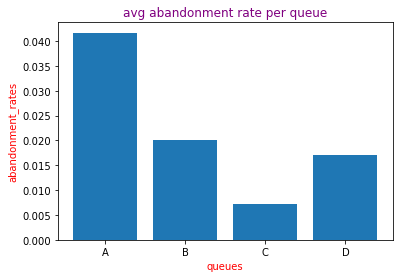

In [37]:
# Create visualization 1 here

# The dictionary abandonment_rates has the data you need.

import pandas as pd
import matplotlib.pyplot as plt




abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    # Bar Chart here
    


queue_dict
abandonment_rates

x = list(abandonment_rates.keys())
y = list(abandonment_rates.values())
plt.bar(x,y)
plt.title('avg abandonment rate per queue',color = 'purple')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('queues',color = 'red')
plt.ylabel('abandonment_rates',color = 'red')
plt.show()


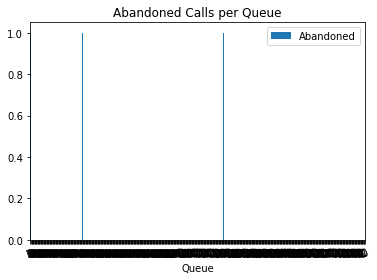

Text(0, 0.5, 'Sales Persons')

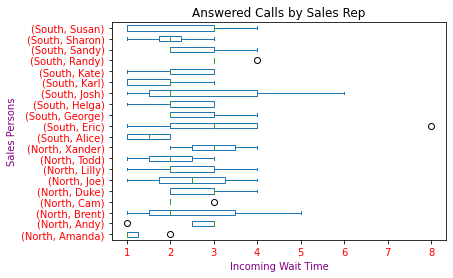

In [43]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep




north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer
box_df = df.pivot_table(values='Calls', index=['Incoming Wait Time'],
                    columns=['Branch', 'Rep ID'], aggfunc='sum')

box_df
graph = box_df.plot(kind = 'box', vert = False)
plt.title("Answered Calls by Sales Rep")
plt.xticks(color = 'REd')
plt.yticks(color = 'RED')
plt.xlabel('Incoming Wait Time',color = 'Purple')
plt.ylabel('Sales Persons',color = 'Purple')


In [46]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

NameError: name 'purpose_group' is not defined

In [51]:
purpose_counts = north_df["Incoming or Outgoing"].value_counts()
#complaints = north_df["Complaint"].to_dict()
sales_support =north_df["Sales Support"].to_dict()
product_support = north_df["Product Support"].to_dict()

KeyError: 'Sales Support'

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

For First i choose bar chart because it was easy to show the data wfor that purpose.
Fpr 2nd  I choose box chart because the no of representatives and there call performance was not in particular some range kind ,so it was easy to show with quartile one.
For 3rd i don't understand fully what o do but what i feel it should bar plots with diffrent color ranges.


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [60]:
# Create your visualization here!

call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
get_group = df.groupby("Time Block").agg("sum")


